## Meeting Structure & Business Understanding

- **Purpose**: Use data analytics to improve targeting and increase sales.
- **Agenda**: Intro → Problem understanding → Insights → ML Model → Business value → Q&A → Next steps.
- **Business Context**: Sports Wear Group is digitally transforming and wants to enhance marketing ROI.
- **Problem**: High volume of non-converting customers = wasted campaign spend.
- **Solution Value**:
  - Smarter targeting → Better conversions.
  - Lower spend → Higher Return of investement.
  - Simulations → Data-driven decisions.
- **Objections Handling**:
  - Complement current tools.
  - Transparent metrics to show value.
  - Quick wins to prove impact.


# summary of preprocessing

In [1]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["check null value", "dubilcated values", "outliers","Skewness","encoding","normalization"]
table.add_row(["I have not null values", "I have not dubilcated values","check with Percentile and solve with median because of outliers ", "use log with positive values, I used boxcox with large positive skewness and  yeo-johnson with negative skewness","I use target encoding with article columns because of alot of values and the other columns  I used LabelEncoder and save original data","I used MinMaxScaler"])
print(table)

+------------------------+------------------------------+------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------+---------------------+
|    check null value    |      dubilcated values       |                             outliers                             |                                                     Skewness                                                     |                                                                encoding                                                                |    normalization    |
+------------------------+------------------------------+------------------------------------------------------------------+------------------------------------------------------------------------------

## Business value of the Model


In [2]:
businesstable = PrettyTable()
businesstable.field_names = ["Improved targeting","Cost saving","Campaign testing"]
businesstable.add_row(["By focsing on high probability of buyers","Reduce sepnd on marketing by avoiding wrong people","make simulate before running the campaign to make sure that the campaign will be reach the target audience"])
print(businesstable)

+------------------------------------------+----------------------------------------------------+------------------------------------------------------------------------------------------------------------+
|            Improved targeting            |                    Cost saving                     |                                              Campaign testing                                              |
+------------------------------------------+----------------------------------------------------+------------------------------------------------------------------------------------------------------------+
| By focsing on high probability of buyers | Reduce sepnd on marketing by avoiding wrong people | make simulate before running the campaign to make sure that the campaign will be reach the target audience |
+------------------------------------------+----------------------------------------------------+---------------------------------------------------------------------------

# Imports

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# check data

In [4]:
data=pd.read_csv("full_gen_data.csv")
data.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [5]:
data["label"].value_counts()

label
0    86072
1    13928
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_9972\697980632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="label", palette="Set2")


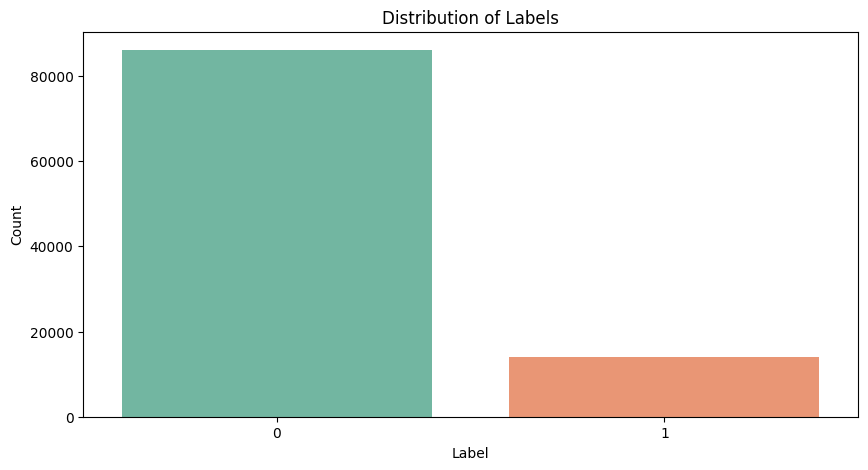

In [6]:
# check if data is implance or not
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="label", palette="Set2")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count") 
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [8]:
data.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


# EDA

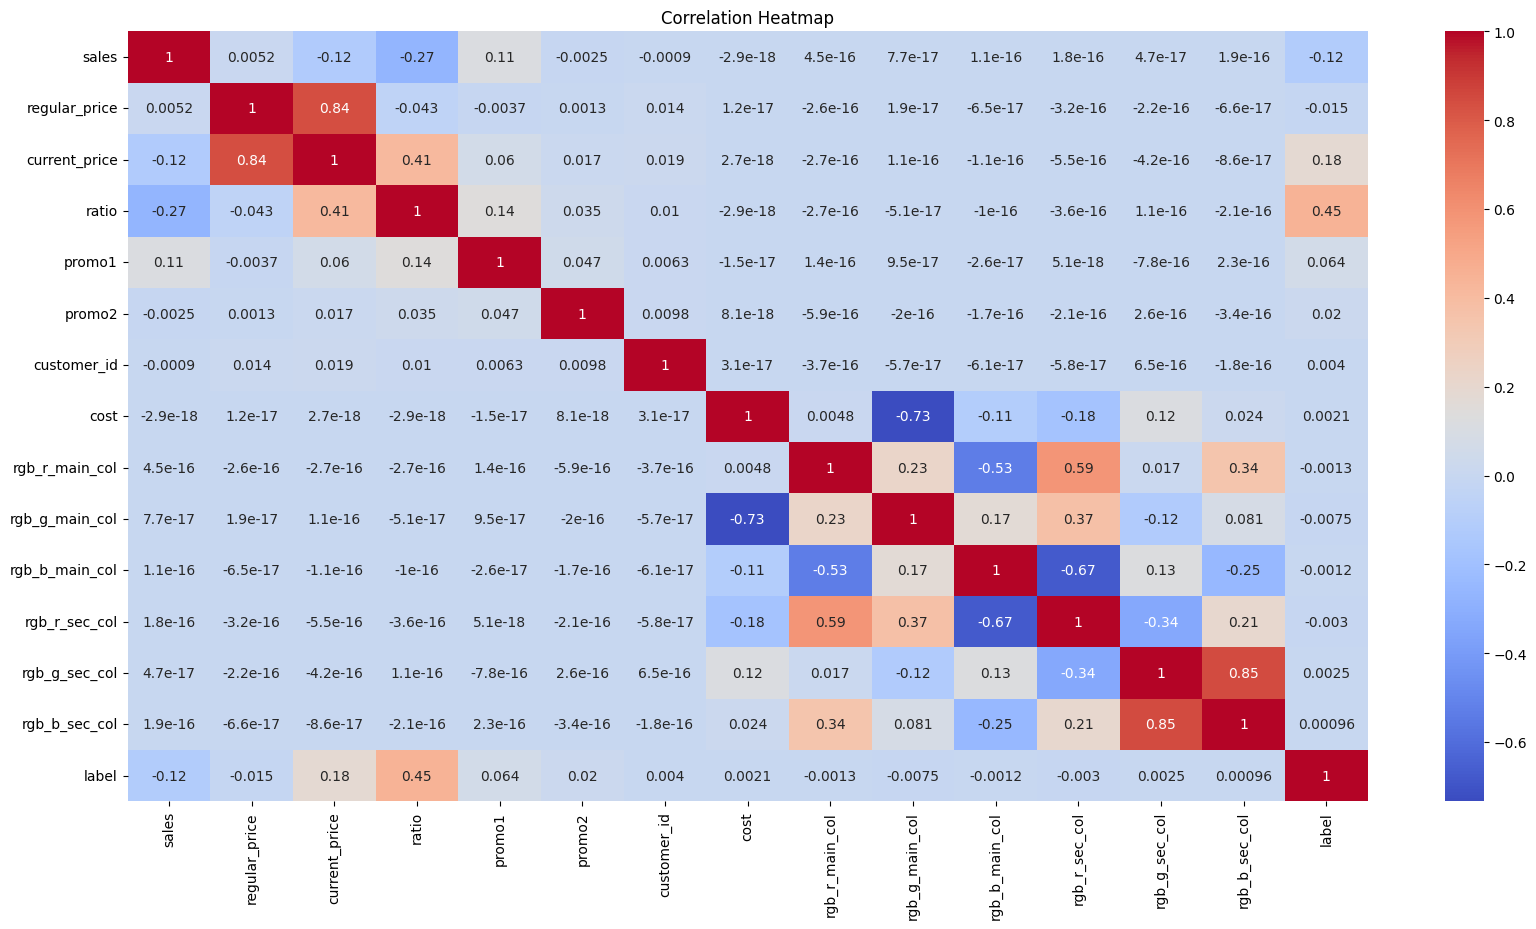

In [9]:
num_data=data.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 10))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

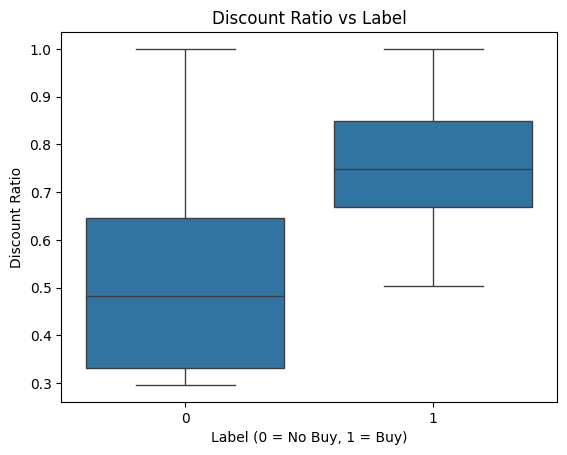

In [10]:
# 
sns.boxplot(data=data, x='label', y='ratio')
plt.title('Discount Ratio vs Label')
plt.xlabel('Label (0 = No Buy, 1 = Buy)')
plt.ylabel('Discount Ratio')
plt.show()


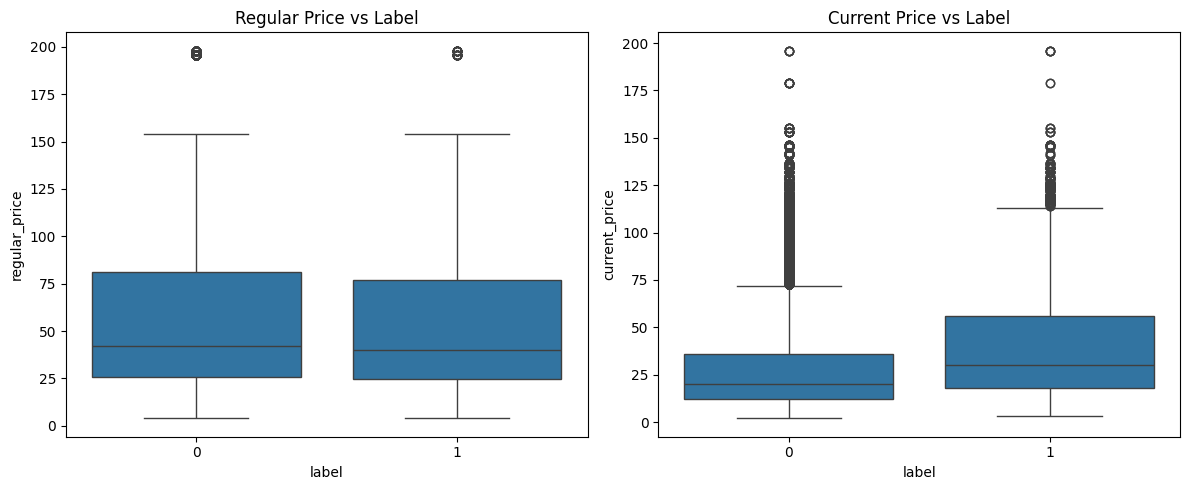

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=data, x='label', y='regular_price', ax=axes[0])
axes[0].set_title('Regular Price vs Label')

sns.boxplot(data=data, x='label', y='current_price', ax=axes[1])
axes[1].set_title('Current Price vs Label')

plt.tight_layout()
plt.show()


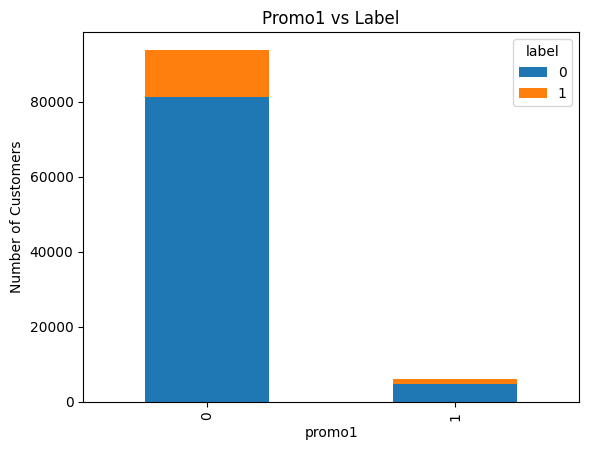

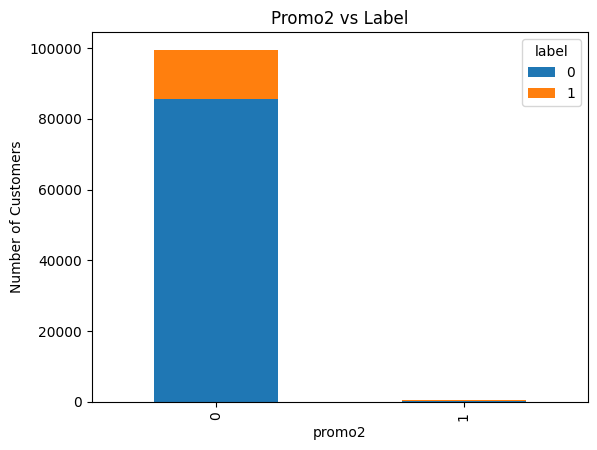

In [12]:

promo_df = data.groupby(['promo1', 'label']).size().unstack().fillna(0)
promo_df.plot(kind='bar', stacked=True)
plt.title('Promo1 vs Label')
plt.ylabel('Number of Customers')
plt.show()

promo_df2 = data.groupby(['promo2', 'label']).size().unstack().fillna(0)
promo_df2.plot(kind='bar', stacked=True)
plt.title('Promo2 vs Label')
plt.ylabel('Number of Customers')
plt.show()


Both of last charts indicate majority of customers not got promo 1 or 2 on class (0) which explian why alot of customers didn't purchase
on the other hand although fewer customers recived a promotion on class (1) who did purchaed 

# preprocessing

In [13]:
number_daat=data.select_dtypes(include=[np.number]).columns.tolist()
number_data=data[number_daat]

In [14]:
category_data=data.select_dtypes("object")


In [15]:
total_rows=number_data.shape[0]
null_data = number_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage


In [16]:
total_rows=category_data.shape[0]
null_data = category_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage


In [17]:
data.duplicated().sum() #check duplicated data  

0

In [18]:
data_without_target=data.drop(columns=["label"])
target=data["label"]

In [19]:
def check_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Column: {col}")
            print(f"Outliers: {len(outliers)}")
    return df
check_outliers(data_without_target)        

Column: sales
Outliers: 9540
Column: regular_price
Outliers: 280
Column: current_price
Outliers: 4480
Column: ratio
Outliers: 0
Column: promo1
Outliers: 6190
Column: promo2
Outliers: 490
Column: customer_id
Outliers: 0
Column: cost
Outliers: 0
Column: rgb_r_main_col
Outliers: 0
Column: rgb_g_main_col
Outliers: 0
Column: rgb_b_main_col
Outliers: 0
Column: rgb_r_sec_col
Outliers: 0
Column: rgb_g_sec_col
Outliers: 0
Column: rgb_b_sec_col
Outliers: 0


,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155


In [20]:
def solve_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            median=df[col].median()
            df[col] = np.where(df[col] < lower_bound, median, df[col])
            df[col] = np.where(df[col] > upper_bound, median, df[col])
            print(f"Column: {col}")
            print(f"Outliers: {len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])}")
           
    return df
data_cleaned=solve_outliers(data_without_target)        

Column: sales
Outliers: 0
Column: regular_price
Outliers: 0
Column: current_price
Outliers: 0
Column: ratio
Outliers: 0
Column: promo1
Outliers: 0
Column: promo2
Outliers: 0
Column: customer_id
Outliers: 0
Column: cost
Outliers: 0
Column: rgb_r_main_col
Outliers: 0
Column: rgb_g_main_col
Outliers: 0
Column: rgb_b_main_col
Outliers: 0
Column: rgb_r_sec_col
Outliers: 0
Column: rgb_g_sec_col
Outliers: 0
Column: rgb_b_sec_col
Outliers: 0


In [21]:
# solve skwness
def fix_skewness(df):
    df_fixed=df.copy()
    skewed_cols=[]
    for col in df.columns:
        if df_fixed[col].dtype!= 'object':
            skewness=df_fixed[col].skew()
            if abs(skewness)>0.5:
                skewed_cols.append(col)
                #log1p with positive values
                if skewness>=0:
                    df_fixed[col]=np.log1p(df_fixed[col])
                elif df_fixed[col].min() > 0:
                #boxcox with large positive skewness    
                    df_fixed[col]=boxcox(df_fixed[col])[0]
                else:
                    #yeo-johnson with negative skewness
                    pt = PowerTransformer(method='yeo-johnson')
                    df_fixed[col] = pt.fit_transform(df_fixed[[col]])
    if not skewed_cols:
        print("No skewed columns found.")                
            
    return df
data_cleaned=fix_skewness(data_cleaned)
data_cleaned.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col
0,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205.0,104.0,57.0,255.0,187.0,255.0
1,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188.0,238.0,104.0,255.0,187.0,255.0
2,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205.0,173.0,0.0,255.0,187.0,255.0
3,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205.0,140.0,149.0,164.0,211.0,238.0
4,Germany,YN8639,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138.0,43.0,226.0,164.0,211.0,238.0


In [22]:
# to know if column is significant or not because if not I'll drop it

chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(data['article.1'], data['label']))
print(f"P-value: {p_val}")
if p_val < 0.05:  # Typically, a p-value < 0.05 suggests significance
    print("The column is significant.")
else:
    print("The column is not significant.")    
    


P-value: 0.3714374000084793
The column is not significant.


In [23]:
data_cleaned=data_cleaned.drop(columns=["article.1"],axis=1)

In [24]:
# to know if column is significant or not because if not I'll drop it

chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(data['article'], data['label']))
print(f"P-value: {p_val}")
if p_val < 0.05:  # Typically, a p-value < 0.05 suggests significance
    print("The column is significant.")


P-value: 1.0732788687682343e-147
The column is significant.


In [25]:
data_cleaned['retailweek']=pd.to_datetime(data_cleaned['retailweek'])

In [26]:
data_cleaned=pd.concat([data_cleaned,target], axis=1)

In [27]:
# I'll use target encoding with article because I have alot of unique values
def target_encode(data, target_col, cat_col):
    mean_encoded = data.groupby(cat_col)[target_col].mean()
    data[cat_col] = data[cat_col].map(mean_encoded)
    return data
data_cleaned = target_encode(data_cleaned, 'label', 'article')
data_cleaned.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205.0,104.0,57.0,255.0,187.0,255.0,0
1,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188.0,238.0,104.0,255.0,187.0,255.0,0
2,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205.0,173.0,0.0,255.0,187.0,255.0,0
3,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205.0,140.0,149.0,164.0,211.0,238.0,0
4,Germany,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138.0,43.0,226.0,164.0,211.0,238.0,0


In [28]:
LabelEncoder=LabelEncoder()
for col in data_cleaned.select_dtypes(include=['object']).columns:

    data_cleaned[col] = LabelEncoder.fit_transform(data_cleaned[col])# convert to numerical values
data_cleaned.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,1,1,3,205.0,104.0,57.0,255.0,187.0,255.0,0
1,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,0,1,3,188.0,238.0,104.0,255.0,187.0,255.0,0
2,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,0,1,3,205.0,173.0,0.0,255.0,187.0,255.0,0
3,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,0,1,0,205.0,140.0,149.0,164.0,211.0,238.0,0
4,2,0.2,28.0,5.95,3.95,0.663866,2016-03-27,0.0,0.0,1003.0,...,0,1,3,138.0,43.0,226.0,164.0,211.0,238.0,0


In [29]:
"""""
num_data=data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
number_data=data_cleaned[num_data]
train_data = number_data.drop(columns=["label"],axis=1)
y = number_data["label"]

min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(train_data)

min_max_scaled_model = pd.DataFrame(min_max_scaled_data, columns=train_data.columns)

min_max_scaled_model.head()
"""""

'""\nnum_data=data_cleaned.select_dtypes(include=[np.number]).columns.tolist()\nnumber_data=data_cleaned[num_data]\ntrain_data = number_data.drop(columns=["label"],axis=1)\ny = number_data["label"]\n\nmin_max_scaler = MinMaxScaler()\nmin_max_scaled_data = min_max_scaler.fit_transform(train_data)\n\nmin_max_scaled_model = pd.DataFrame(min_max_scaled_data, columns=train_data.columns)\n\nmin_max_scaled_model.head()\n'

In [30]:
#final_data=pd.concat([min_max_scaled_model, y], axis=1)
#final_data.head()

# feature engineering

In [31]:
discount=1-data_cleaned["ratio"]
data_cleaned["discoint"]=discount

In [32]:
data_cleaned["discoint"].isnull().sum() # check if there is null values

0

# Build Model

In [33]:
X=data_cleaned.drop(columns=["label"],axis=1)
target=data_cleaned["label"]


In [34]:
# تحويل datetime لخصائص رقمية
X['retailweek'] = pd.to_datetime(X['retailweek'])  # تأكد من التنسيق
X['retailweek_year'] = X['retailweek'].dt.year
X['retailweek_month'] = X['retailweek'].dt.month
X['retailweek_week'] = X['retailweek'].dt.isocalendar().week
X['retailweek_day'] = X['retailweek'].dt.day
X = X.drop(columns=['retailweek'])


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country           100000 non-null  int32  
 1   article           100000 non-null  float64
 2   sales             100000 non-null  float64
 3   regular_price     100000 non-null  float64
 4   current_price     100000 non-null  float64
 5   ratio             100000 non-null  float64
 6   promo1            100000 non-null  float64
 7   promo2            100000 non-null  float64
 8   customer_id       100000 non-null  float64
 9   productgroup      100000 non-null  int32  
 10  category          100000 non-null  int32  
 11  cost              100000 non-null  float64
 12  style             100000 non-null  int32  
 13  sizes             100000 non-null  int32  
 14  gender            100000 non-null  int32  
 15  rgb_r_main_col    100000 non-null  float64
 16  rgb_g_main_col    100

In [36]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
from sklearn.pipeline import Pipeline

pipelines = {
    "XGBClassifier": Pipeline([
        ('scaler', StandardScaler()),  # ممكن تستغنى عنه لو مش مؤثر
        ('model', XGBClassifier(tree_method="gpu_hist" if device == "cuda" else "hist",
                                use_label_encoder=False, verbosity=0))
    ]),
    "RandomForestClassifier": Pipeline([
        # الشجر مش محتاج scaling، فبنحذف StandardScaler
        ('model', RandomForestClassifier(class_weight="balanced"))
    ]),
    "DecisionTreeClassifier": Pipeline([
        ('model', DecisionTreeClassifier(class_weight="balanced"))
    ]),
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(class_weight="balanced", max_iter=1000))
    ]),
    "LightBoosting": Pipeline([
        ('scaler', StandardScaler()),  
        ('model', lgb.LGBMClassifier())
    ])
}


visualize reults on table

#I will choose Logistic beacause it was able to recognize the recall of class (1) 0.86%



In [38]:
for name, model in pipelines.items():

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(model, X, target, cv=kfold, scoring='roc_auc')
    print(f"Cross-Validation ROC-AUC Scores: {cross_val_scores}")
    print(f"{name}: Mean accuracy = {np.mean(cross_val_scores):.4f}, Std = {np.std(cross_val_scores):.4f}")


Cross-Validation ROC-AUC Scores: [0.84295513 0.83992472 0.84912059 0.84684467 0.8457118 ]
XGBClassifier: Mean accuracy = 0.8449, Std = 0.0032
Cross-Validation ROC-AUC Scores: [0.83665348 0.83480331 0.84148216 0.83742531 0.83976225]
RandomForestClassifier: Mean accuracy = 0.8380, Std = 0.0023
Cross-Validation ROC-AUC Scores: [0.60001058 0.60843157 0.6016622  0.59899798 0.60851783]
DecisionTreeClassifier: Mean accuracy = 0.6035, Std = 0.0041
Cross-Validation ROC-AUC Scores: [0.85787201 0.85578559 0.86263242 0.86103849 0.85925893]
LogisticRegression: Mean accuracy = 0.8593, Std = 0.0024
[LightGBM] [Info] Number of positive: 11117, number of negative: 68883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 80000, number of use

🔍 Tuning XGBClassifier...


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train,

✅ Best score for XGBClassifier: 0.8609
🔧 Best params: {'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.1}

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     86072
           1       0.53      0.05      0.10     13928

    accuracy                           0.86    100000
   macro avg       0.70      0.52      0.51    100000
weighted avg       0.82      0.86      0.81    100000



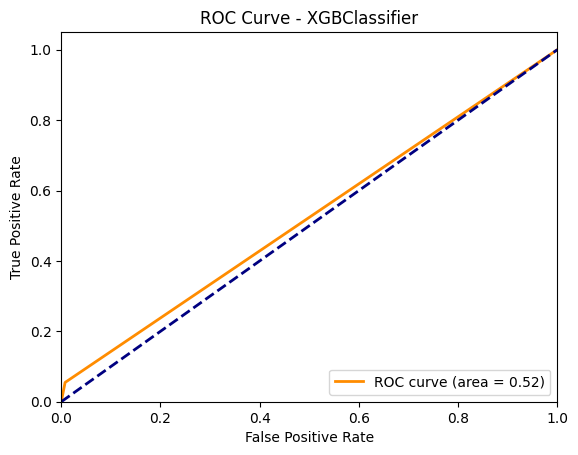

🔍 Tuning RandomForestClassifier...


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best score for RandomForestClassifier: 0.8567
🔧 Best params: {'model__n_estimators': 100, 'model__max_depth': None}

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86072
           1       1.00      1.00      1.00     13928

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



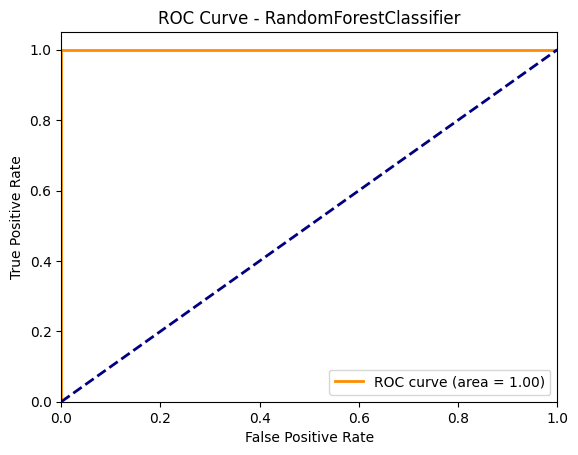

🔍 Tuning DecisionTreeClassifier...


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best score for DecisionTreeClassifier: 0.8113
🔧 Best params: {'model__min_samples_split': 2, 'model__max_depth': None}

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86072
           1       1.00      1.00      1.00     13928

    accuracy                           1.00    100000
   macro avg       1.00      1.00      1.00    100000
weighted avg       1.00      1.00      1.00    100000



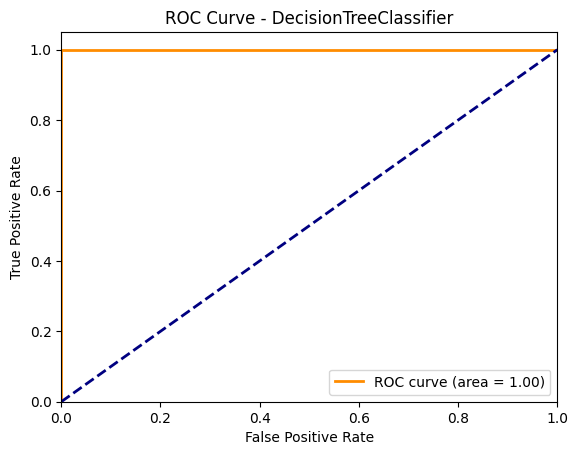

🔍 Tuning LogisticRegression...


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best score for LogisticRegression: 0.7565
🔧 Best params: {'model__C': 0.1}

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     86072
           1       0.34      0.83      0.49     13928

    accuracy                           0.76    100000
   macro avg       0.65      0.79      0.66    100000
weighted avg       0.88      0.76      0.79    100000



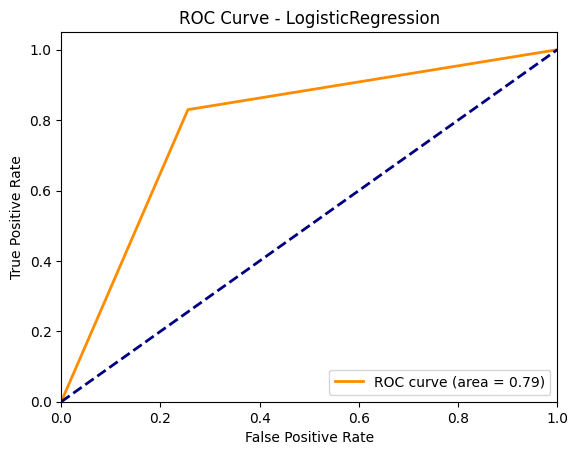

🔍 Tuning LightBoosting...


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13928, number of negative: 86072
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139280 -> initscore=-1.821283
[LightGBM] [Info] Start training from score -1.821283
✅ Best score for LightBoosting: 0.8608
🔧 Best params: {'model__n_estimators': 200, 'model__learning_rate': 0.01}

Classification Report for LightBoosting:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     86072
           1       0.88      0.00      0.01     13928

    accuracy                           0.86    100000
   macro avg       0.87      0.50      0.47    100000
weighted avg  

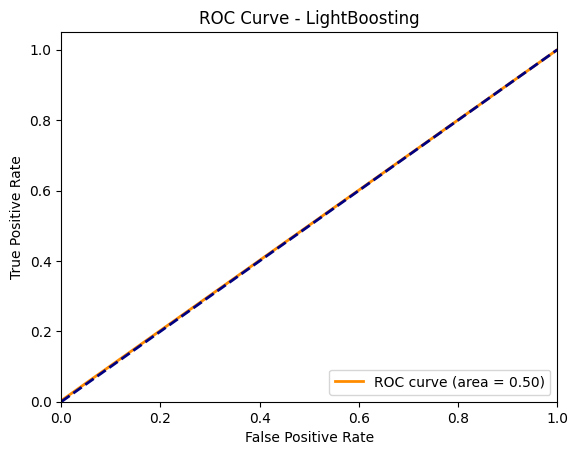

In [39]:
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    "XGBClassifier": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5],
        'model__learning_rate': [0.01, 0.1]
    },
    "RandomForestClassifier": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10]
    },
    "DecisionTreeClassifier": {
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [2, 5]
    },
    "LogisticRegression": {
        'model__C': [0.1, 1.0, 10.0]
    },
    "LightBoosting": {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    }
}

best_models = {}
for name in pipelines:
    print(f"🔍 Tuning {name}...")
    random_search = RandomizedSearchCV(pipelines[name], param_grids[name], n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X, target)
    best_models[name] = random_search.best_estimator_
    print(f"✅ Best score for {name}: {random_search.best_score_:.4f}")
    print(f"🔧 Best params: {random_search.best_params_}")

    # Get predicted probabilities (important for ROC curve)
    #y_prob = random_search.best_estimator_.predict_proba(X)[:, 1]  # For binary classification
    y_prob = random_search.best_estimator_.predict(X)

    print(f"\nClassification Report for {name}:")
    print(classification_report(target, y_prob))
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(target, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

In [42]:
lg_pipelines = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight="balanced", C=0.1))
])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lg_pipelines, X, target, cv=kfold, scoring='roc_auc')

print("Cross-Validation ROC-AUC Scores:", scores)
print(f"Mean AUC: {np.mean(scores):.4f}, Std: {np.std(scores):.4f}")

lg_pipelines.fit(X, target)
y_pred = lg_pipelines.predict(X)

Cross-Validation ROC-AUC Scores: [0.85787294 0.85578919 0.86263324 0.8610335  0.85925802]
Mean AUC: 0.8593, Std: 0.0024


In [44]:
import joblib

joblib.dump(lg_pipelines, "logistic_model.pkl")



['logistic_model.pkl']

In [45]:
joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']

# Next Step
1-test he model on the real campaign
2-if results are satisfactory, we can deploy it 